In [1]:
import pickle as pkl
import pandas as pd
import numpy as np

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [3]:
cd /Users/abhay/GoogleDrive/BL/Project/Covid_GNN_PDE/code

/Users/abhay/GoogleDrive/BL/Project/Covid_GNN_PDE/code


In [4]:
ls

__pycache__/                          state_daily_norm_tmp_fig/
data_pos.csv                          state_daily_norm_tmp_fig_10k/
data_pos.txt                          test.py
data_pos_1.txt                        tmp_covid/
data_t.csv                            tmp_covid_daily/
data_t.txt                            tmp_covid_state_daily/
data_t_1.txt                          tmp_covid_state_daily_norm/
diff_state_daily_norm.txt             tmp_covid_state_daily_norm_10k/
diff_state_daily_norm_10k.txt         tmp_logs_covid/
diffs.png                             train.py
grid.png                              u_gt.csv
model_covid.pth                       u_gt.txt
model_covid_daily.pth                 u_gt_1.csv
model_covid_state_daily.pth           u_gt_1.txt
model_covid_state_daily_norm.pth      u_pred.csv
model_covid_state_daily_norm_10k.pth  u_pred.txt
pdegs/                                u_pred_1.csv
state_daily_norm_tmp.npy              u_pred_1.txt
state_daily_norm_tmp_1.npy  

In [5]:
states_norm = pd.read_csv('data_pos.csv')

In [6]:
states = states_norm.copy()

In [7]:
states.head()

,Lat,Long
0,0.349,0.764
1,1.000,0.100
2,0.367,0.496
3,0.397,0.702
4,0.467,0.396


In [8]:
lat_max, lat_min, long_max, long_min = (60.24750915137932, 18.239787564102564, -64.8963, -157.32323648)

In [9]:
lat_max, lat_min, long_max, long_min

(60.24750915137932, 18.239787564102564, -64.8963, -157.32323648)

In [10]:
states['Lat'] = states['Lat']*(lat_max-lat_min) + lat_min

In [11]:
states.head()

,Lat,Long
0,32.900482,0.764
1,60.247509,0.100
2,33.656621,0.496
3,34.916853,0.702
4,37.857394,0.396


In [12]:
states['Long'] = states['Long']*(long_max-long_min) + long_min

In [13]:
states.head()

,Lat,Long
0,32.900482,-86.709057
1,60.247509,-148.080543
2,33.656621,-111.479476
3,34.916853,-92.439527
4,37.857394,-120.722170


In [14]:
lat = states['Lat'].values
lon = states['Long'].values

In [15]:
type(lat), lat.shape

(numpy.ndarray, (53,))

In [16]:
u_gt = pd.read_csv('u_gt.csv',  header=None)
print(len(u_gt))
u_gt.head()

300


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00003,0.0,0.000061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
u_pd = pd.read_csv('u_pred.csv',  header=None)
print(len(u_pd))
u_pd.head()

300


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000105,0.000022,-0.000046,0.000098,0.000141,0.000159,0.000094,-0.000031,0.000089,0.000179,...,0.000084,0.000231,0.000129,0.000034,0.000001,0.000086,0.000023,0.000093,0.000036,0.000125
2,0.000209,0.000045,-0.000085,0.000196,0.000282,0.000315,0.000187,-0.000059,0.000178,0.000356,...,0.000168,0.000457,0.000257,0.000068,0.000002,0.000171,0.000045,0.000185,0.000073,0.000248
3,0.000312,0.000067,-0.000118,0.000293,0.000423,0.000470,0.000279,-0.000085,0.000266,0.000531,...,0.000252,0.000678,0.000384,0.000102,0.000003,0.000256,0.000064,0.000276,0.000111,0.000370
4,0.000415,0.000090,-0.000144,0.000389,0.000563,0.000623,0.000371,-0.000109,0.000353,0.000704,...,0.000334,0.000895,0.000509,0.000135,0.000004,0.000340,0.000083,0.000367,0.000149,0.000490


In [17]:
u_gt.iloc[2].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [18]:
type(u_gt.iloc[2].values), u_gt.iloc[2].values.shape

(numpy.ndarray, (53,))

In [93]:
plot_val = u_gt.iloc[251].values*33046
plot_val

array([1.18800005e+03, 1.06000003e+02, 3.22999988e+02, 9.22999982e+02,
       3.46099999e+03, 5.10999998e+02, 2.15999995e+02, 8.19999993e+01,
       2.60000002e+01, 1.92999995e+03, 0.00000000e+00, 1.18999998e+02,
       6.14000002e+02, 2.25100005e+03, 9.52999977e+02, 1.02200000e+03,
       2.63999987e+02, 9.84000023e+02, 4.10999994e+02, 5.20000004e+01,
       4.13999993e+02, 5.05999989e+02, 1.19100002e+03, 6.85999990e+02,
       5.51999971e+02, 1.84000006e+02, 3.47000015e+02, 5.29000026e+02,
       3.84999988e+02, 3.29999984e+01, 7.21999984e+02, 2.77999995e+02,
       9.99999979e+02, 8.90000033e+01, 4.45000009e+02, 1.07999995e+03,
       9.74000004e+02, 2.18000005e+02, 9.19000023e+02, 1.78999996e+02,
       6.63999973e+02, 3.07999990e+02, 3.92000007e+02, 1.52699996e+03,
       5.80699992e+03, 9.05999974e+02, 2.99999999e+00, 0.00000000e+00,
       7.55000009e+02, 6.39999977e+02, 1.56999995e+02, 2.31900008e+03,
       1.27000000e+02])

In [92]:
plot_val = u_gt.iloc[51].values*33046
plot_val

array([  7.00000013,   0.        ,   2.99999999,   2.99999999,
        90.00000058,  24.99999909,  11.99999995,   0.        ,
         0.        ,  19.00000008,   0.        ,   0.        ,
         1.99999995,  18.00000089,   2.99999999,   0.        ,
         1.99999995,   0.        ,  43.99999917,   0.        ,
         1.99999995,   0.        ,  13.00000011,  10.99999979,
         0.        ,   0.99999998,   0.        ,   0.        ,
         1.99999995,   0.        ,   0.        ,   2.99999999,
       153.0000056 ,   9.99999964,   0.        ,  14.00000026,
         0.99999998,   5.99999997,   5.99999997,   0.        ,
         0.        ,   0.        ,   0.        ,   5.99999997,
        15.99999961,   0.99999998,   0.        ,   0.        ,
        10.99999979,  99.99999637,   0.        ,   7.99999981,
         0.        ])

In [107]:
def map_plot(plot_val):
    # 1. Draw the map background
    fig = plt.figure(figsize=(8, 8))
    #m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    #m.shadedrelief() m.drawcountries(linewidth=2)
    #m.drawstates(color='b')
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')

    # 2. scatter and size reflecting #cases  c=plot_val
    m.scatter(lon, lat, latlon=True,s=plot_val,
              cmap='Reds', alpha=0.5)
    plt.show()
    # 3. create colorbar and legend
    #plt.colorbar(label=r'$\log_{10}({\rm population})$')
    #plt.clim(3, 7)

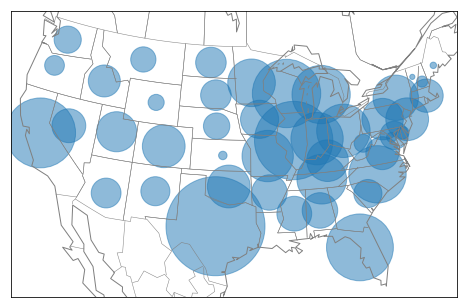

In [109]:
map_plot(u_gt.iloc[275].values*33046)

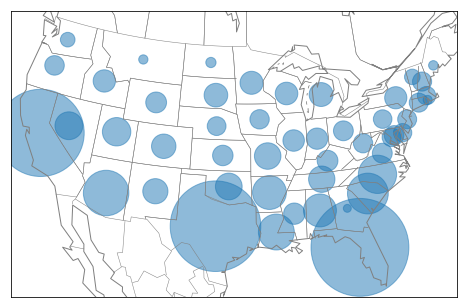

In [110]:
map_plot(u_pd.iloc[275].values*33046)

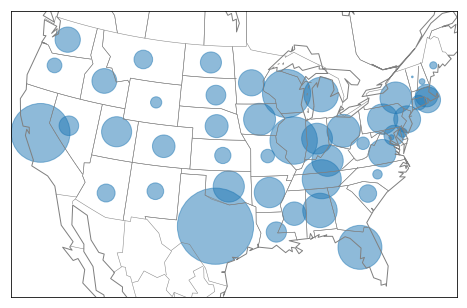

In [108]:
val = u_gt.iloc[251].values*33046
#print(val)
map_plot(val)

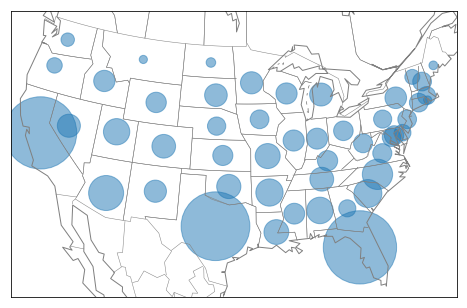

In [99]:
val = u_pd.iloc[251].values*33046
#print(val)
map_plot(val)

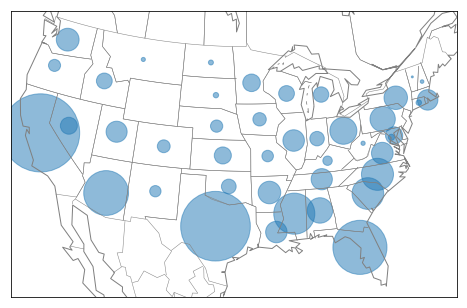

In [103]:
map_plot(u_gt.iloc[151].values*33046)

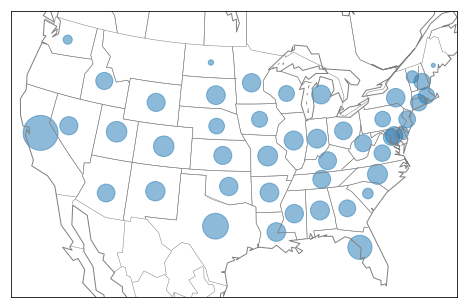

In [102]:
map_plot(u_pd.iloc[151].values*33046)

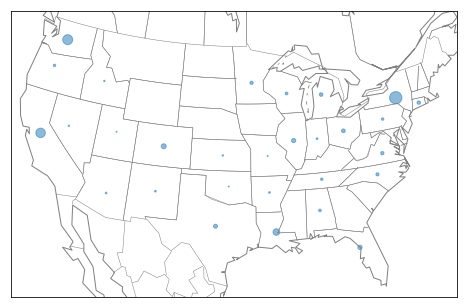

In [100]:
val = u_gt.iloc[51].values*33046
map_plot(val)

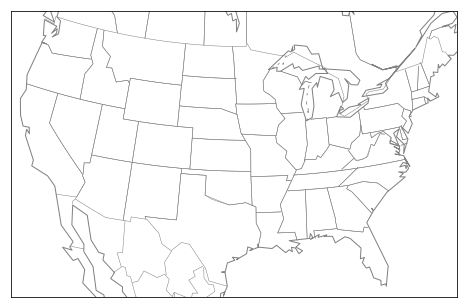

In [101]:
val = u_pd.iloc[0].values*33046
map_plot(val)